In [34]:
# Importing the Necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [35]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [36]:
df = sns.load_dataset('tips')

In [37]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [38]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [39]:
df.shape

(244, 7)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [41]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [43]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [44]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [45]:
df.duplicated().sum()

np.int64(1)

In [46]:
df1 = df

In [47]:
df1.drop_duplicates(inplace=True)

In [48]:
num = df1.select_dtypes(include=['int64','float64']).columns.tolist()
cat = df1.select_dtypes(exclude=['int64','float64']).columns.tolist()

print(num)
print(cat)

['total_bill', 'tip', 'size']
['sex', 'smoker', 'day', 'time']


total_bill


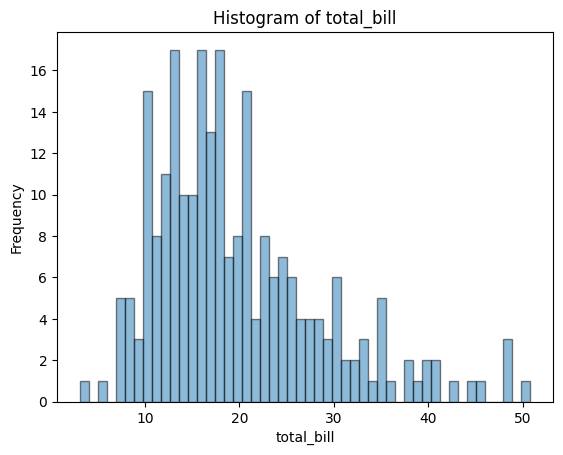

tip


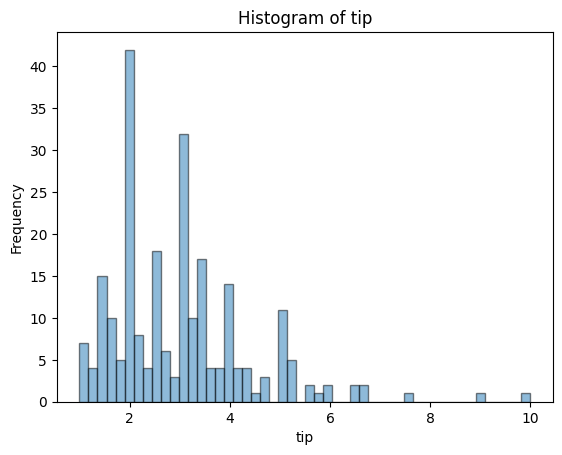

size


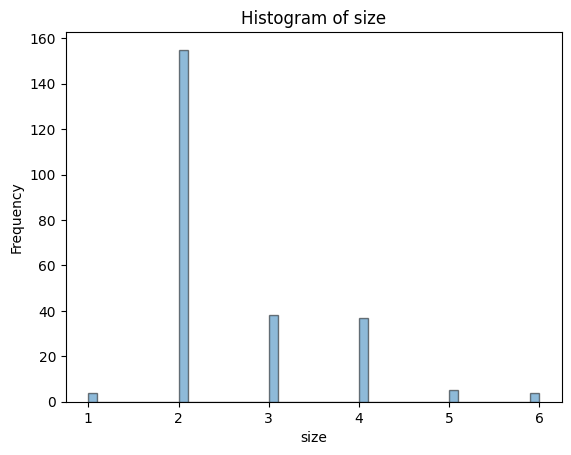

In [49]:
for col in num:
    print(col)
    
    df1[col].plot(kind='hist', bins=50, edgecolor='black', alpha=0.5)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

sex


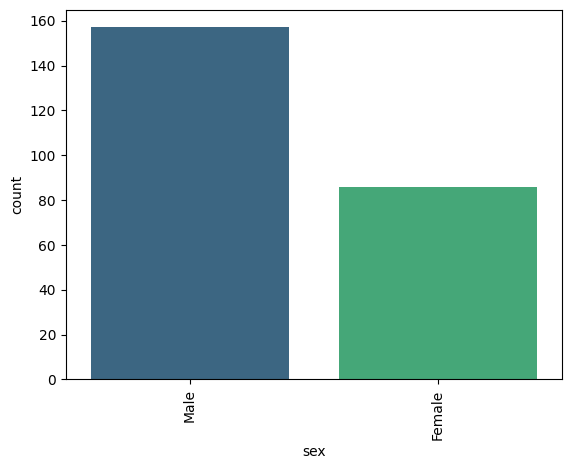

smoker


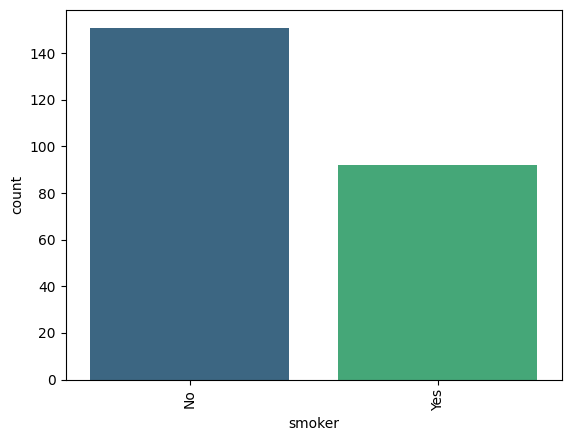

day


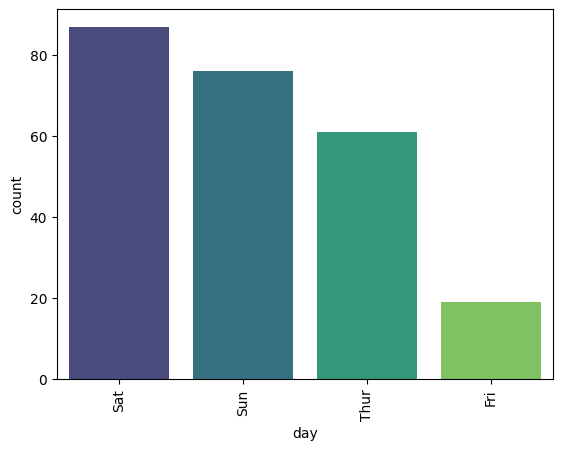

time


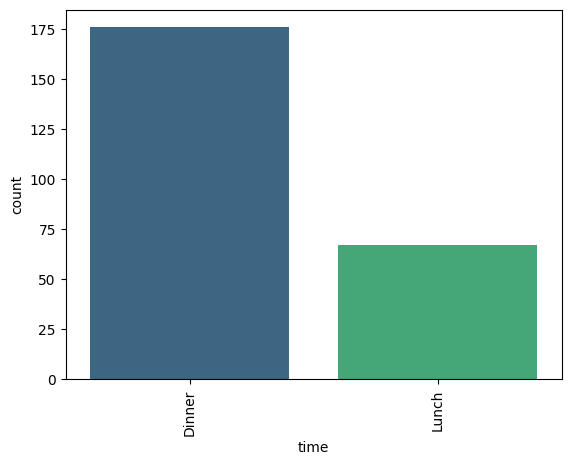

In [50]:
for col in cat:
    print(col)
    
    sns.countplot(x=col, data=df1, order=df1[col].value_counts().index, palette='viridis')
    plt.xticks(rotation=90)
    
    plt.show()

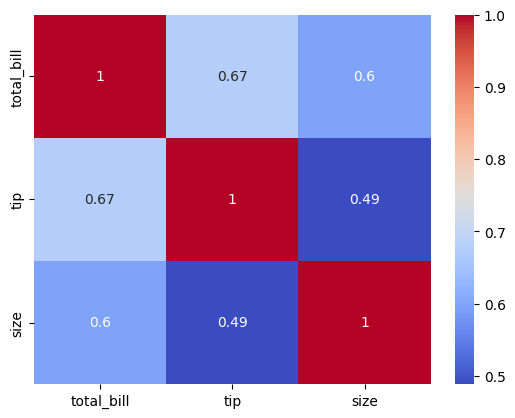

In [51]:
corr = df[num].corr(method='pearson')

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

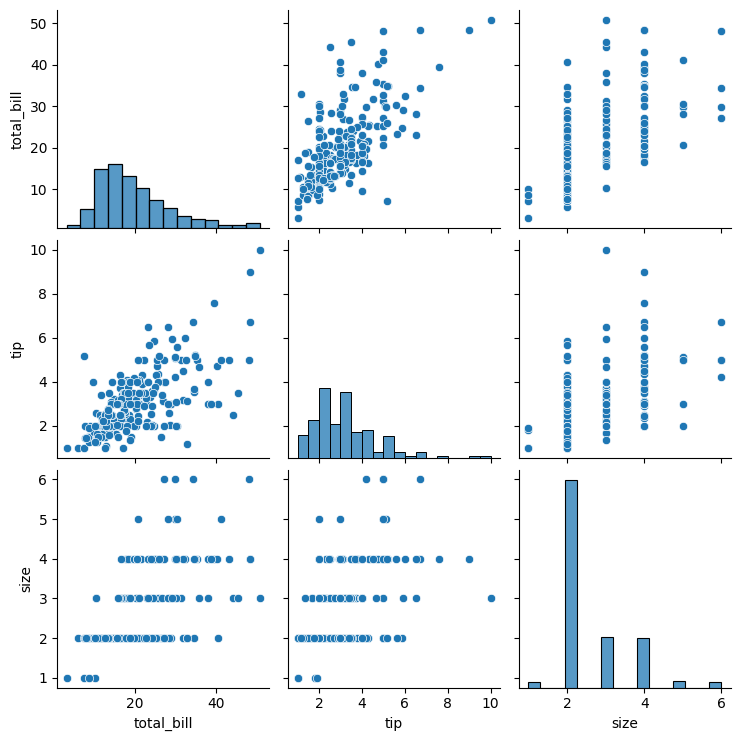

In [52]:
sns.pairplot(df, kind='scatter')
plt.show()

In [53]:
total_bill_vs_gender = df.groupby('sex')['total_bill'].sum()
total_bill_vs_gender

sex
Male      3256.82
Female    1557.95
Name: total_bill, dtype: float64

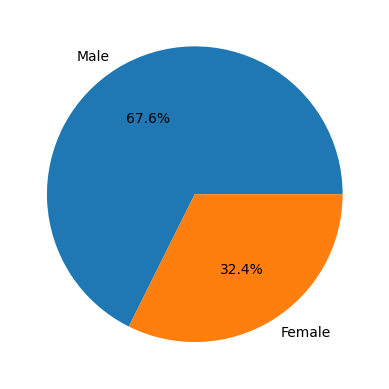

In [54]:
plt.pie(total_bill_vs_gender, labels=total_bill_vs_gender.index, autopct='%1.1f%%')
plt.show()

In [55]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [56]:
df.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.843140
Name: tip, dtype: float64

In [57]:
df.groupby('day')['tip'].mean()

day
Thur    2.784098
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [58]:
df.groupby('day')['total_bill'].sum()

day
Thur    1083.33
Fri      325.88
Sat     1778.40
Sun     1627.16
Name: total_bill, dtype: float64

In [59]:
df.groupby('time')['total_bill'].sum()

time
Lunch     1154.47
Dinner    3660.30
Name: total_bill, dtype: float64

In [60]:
df.groupby('time')['tip'].sum()

time
Lunch     183.51
Dinner    546.07
Name: tip, dtype: float64

In [61]:
df.groupby('time')['size'].sum()

time
Lunch     162
Dinner    463
Name: size, dtype: int64

In [62]:
df.groupby('time')['smoker'].count()

time
Lunch      67
Dinner    176
Name: smoker, dtype: int64